<a href="https://colab.research.google.com/github/ftempesta/Data-Science-Online/blob/master/Laboratorio_1_Pre_procesamiento_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instrucciones

- Trabaja en grupos de dos a tres personas.
- Haz una copia de este notebook en `File -> Save a copy in Drive`.
- Recomiendo que uno de los integrantes transmita su pantalla con el notebook mientras conversan con los demás integrantes.
- Al final de la sesión, descarga el notebook `File -> Download -> Download .ipynb` y súbelo en la sección Tareas de U-Cursos que se abrirá para esta sesión.


# Laboratorio

In [ ]:
import pandas as pd

## 1. Imputar datos faltantes

El siguiente código carga un dataset que contiene datos sobre cáncer de mama.

In [ ]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', header=None)

data.columns = ['Sample code', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
                'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
                'Normal Nucleoli', 'Mitoses','Class']

# eliminamos columnas que no usaremos
data = data.drop(columns=['Sample code', 'Class'], axis=1)

print('Instancias = %d' % (data.shape[0]))
print('Atributos = %d' % (data.shape[1]))

# primeras filas del dataset
data.head()

Instancias = 699
Atributos = 9


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


De acuerdo a la [descripción del dataset](https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(original)), éste tiene datos faltantes, y dice que fueron marcados como "?".

Los datos faltantes está en la columna "Bare Nuclei".

**Pregunta 1**

En el siguiente bloque escriba el código que filtra `data` de forma que entregue las filas que contienen datos faltantes.

In [ ]:
#### modificar esta celda


---

El siguiente código reporta cuáles otras filas contienen datos faltantes y cambia el valor "?" por `NaN`.

In [ ]:
import numpy as np

data = data.replace('?', np.NaN)

print('Instancias = %d' % (data.shape[0]))
print('Atributos = %d' % (data.shape[1]))

print('Datos faltantes:')
for col in data.columns:
    print('\t%s: %d' % (col, data[col].isna().sum()))

Instancias = 699
Atributos = 9
Datos faltantes:
	Clump Thickness: 0
	Uniformity of Cell Size: 0
	Uniformity of Cell Shape: 0
	Marginal Adhesion: 0
	Single Epithelial Cell Size: 0
	Bare Nuclei: 16
	Bland Chromatin: 0
	Normal Nucleoli: 0
	Mitoses: 0


Ahora imputamos los datos faltantes con la mediana. El siguiente código muestra algunas filas de la columna "Bare Nuclei" antes y después del cambio.

In [ ]:
bare_nuclei = data['Bare Nuclei']

print('Antes de imputar datos faltantes:')
print(bare_nuclei.iloc[20:25])
bare_nuclei = bare_nuclei.fillna(bare_nuclei.median())

print('\nDespués de imputar datos faltantes:')
print(bare_nuclei.iloc[20:25])

Antes de imputar datos faltantes:
20    10.0
21     7.0
22     1.0
23     NaN
24     1.0
Name: Bare Nuclei, dtype: float64

Después de imputar datos faltantes:
20    10.0
21     7.0
22     1.0
23     1.0
24     1.0
Name: Bare Nuclei, dtype: float64


## 2. Outliers


Vimos que los "outliers" son instancias cuyos atributos se salen de la norma, o que son considerablemente distintos que las otras instancias.

En el siguiente código usaremos un Boxplot para identificar en qué columnas puede haber outliers.

Como la columna "Bare Nuclei" tenía valores "?", la columna fue interpretada con datos de tipo string, mientras que las otras tienen datos de tipo numérico, por lo que debemos transformar la columna antes de proceder.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


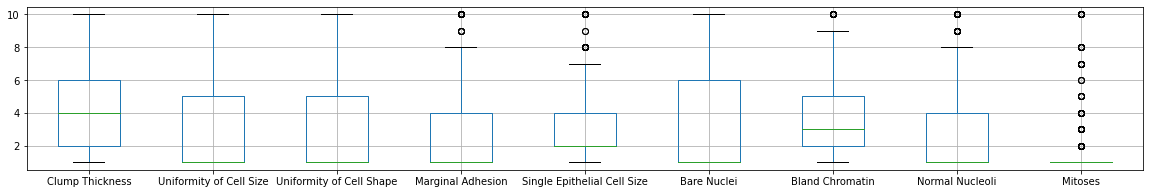

In [ ]:
%matplotlib inline

# nota que no hemos modificado la columna 'Bare Nuclei', por lo que todavía contiene celdas NaN
data['Bare Nuclei'] = pd.to_numeric(data['Bare Nuclei'])
data.boxplot(figsize=(20, 3))

**Pregunta 2**

¿Qué columnas sugiere el boxplot que contienen outliers? Modifica el bloque de texto a continuación.

---

El siguiente código *estandariza* los datos. Es decir, cada celda indicará *cuántas desviaciones estándar se está alejando del promedio de su columna*.

In [ ]:
Z = (data - data.mean()) / data.std()
Z.iloc[20:25]

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
20,0.917080,-0.044070,-0.406284,2.519152,0.805662,1.771569,0.640688,0.371049,1.405526
21,1.982519,0.611354,0.603167,0.067638,1.257272,0.948266,1.460910,2.335921,-0.343666
22,-0.503505,-0.699494,-0.742767,-0.632794,-0.549168,-0.698341,-0.589645,-0.611387,-0.343666
23,1.272227,0.283642,0.603167,-0.632794,-0.549168,NaN,1.460910,0.043570,-0.343666
24,-1.213798,-0.699494,-0.742767,-0.632794,-0.549168,-0.698341,-0.179534,-0.611387,-0.343666


**Pregunta 3**

Reporta al menos 5 filas que consideres que pueden ser outliers.

Para ello, puedes explorar distintos rangos de Z en el bloque anterior (ejemplo: `25:40`), o puedes filtrar Z sobre algunas columnas, etc.

Describe brevemente cuál fue el criterio que usaron para elegir outliers y deja el código que usaste abajo.

In [ ]:
### modifica este bloque de código
### puedes describir el criterio usando comentarios como este

---

## 3. Muestreo



El siguiente código toma una muestra al azar de tres filas. Ejecuta el siguiente bloque un par de veces y observa los resultados.

In [ ]:
muestra = data.sample(n=3)
muestra

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
442,1,1,1,3,2,3.0,1,1,1
314,1,1,1,1,1,1.0,2,1,1
188,5,8,4,10,5,8.0,9,10,1


El siguiente código elige al azar un 1% de los datos (sin reemplazo) y entrega la muestra seleccionada.

Nota el parámetro `random_state`. Esto fija la semilla del generador de números aleatorios. Al usar el mismo valor, la muestra siempre será la misma.

Ejecuta el siguiente bloque varias veces y observa los resultados.

In [ ]:
muestra = data.sample(frac=0.01, random_state=12)
muestra

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
150,1,1,1,1,1,1.0,3,1,1
79,2,1,1,1,3,1.0,2,1,1
468,4,1,1,1,2,1.0,1,1,1
603,5,4,6,8,4,1.0,8,10,1
138,4,1,2,1,2,1.0,2,1,1
14,8,7,5,10,7,9.0,5,5,4
267,3,3,5,2,3,10.0,7,1,1


## 4. Discretización

Discretizar se usa normalmente para convertir una variable cuantitativa en una categórica.

Veamos por medio de un histograma de una de las columnas del dataset:

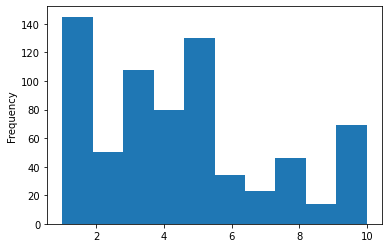

In [ ]:
data['Clump Thickness'].plot(kind='hist', bins=10)

In [ ]:
## usando value_counts podemos ver cuántos valores distintos existen
## en este caso, dice que "1" aparece 145 veces

data['Clump Thickness'].value_counts()

1     145
5     130
3     108
4      80
10     69
2      50
8      46
6      34
7      23
9      14
Name: Clump Thickness, dtype: int64

En esta sección veremos dos métodos no supervisados para discretizar esta columna.

El primero es el método `cut` que crea cuatro "bins" de rango similar.

In [ ]:
bins = pd.cut(data['Clump Thickness'], 4)
bins.value_counts()

(0.991, 3.25]    303
(3.25, 5.5]      210
(7.75, 10.0]     129
(5.5, 7.75]       57
Name: Clump Thickness, dtype: int64

Observa que `bins` tiene 4 valores distintos, llamados `(0.991, 3.25]`, `(3.25, 5.5]`, `(7.75, 10.0]`, y `(5.5, 7.75]`.

El otro método discretiza por igual frecuencia de los datos, llamado `qcut`.

Vamos a particionar la columna en cuatro bins de forma que cada bin tenga la misma cantidad de instancias:

In [ ]:
bins = pd.qcut(data['Clump Thickness'], 4)
bins.value_counts()

(0.999, 2.0]    195
(2.0, 4.0]      188
(4.0, 6.0]      164
(6.0, 10.0]     152
Name: Clump Thickness, dtype: int64

**Pregunta 4**

¿Cómo afecta el muestreo aleatorio a las dos formas de discretización vistas arriba? 

Discute con tu compañero al respecto e indica abajo, para cada forma de discretización, cómo afecta a los resultados de la discretización el realizar muestreo aleatorio.

Puedes escribir código para experimentar con los datos.

In [ ]:
### puedes escribir código acá

---
fin